# Техника сглаживания для тензорных норм

Техника сглаживания оказала достаточно большое влияние на развитие методов восстановления тензоров (matrix completion problem является частным случаем). 

Рассмотрим задачу восстановления матрицы $Y$. Мы наблюдаем только небольшой набор элементов матрицы $Y$, множество индексов известных элементов обозначим через $E$. То есть мы знаем $Y_{ij}$ для всех $(i,j) \in E$, и не знаем $Y_{ij}$ для всех $(i,j) \notin E$.

Понятно, что без наличия какой-либо дополнительной информации о матрице $Y$ эта постановка является тривиальной: любая матрица $X$, для которой выполнено $X_{i,j} = Y_{i,j}, \quad (i,j) \in E$ является разумным ответом. Таких матриц бесконечно много. Соответственно задача восстановления матриц обычно рассматривается как частный случай задачи приближения матрицы, а критерий качества (целевая функция) говорит не столько о близости $X$ к $Y$, сколько о полезных свойствах матрицы $X$ (этим свойствам матрица $Y$ может и не обладать).

Одна из самых популярных постановок, с которой Вы наверняка сталкивались, например, строя рекомендательные системы, является задача о поиске наилучшего приближения заданной матрицы матрицей малого ранга:

$$
\begin{align*}
& \min_{X} rk(X) \\
& X_{i,j} = Y_{i,j}, \quad (i,j) \in E\\
\end{align*}
$$
Как известно, в общем случае эта задача является NP-трудной.

Для того, чтобы обойти это припятствие ранк матрицы аппроксимируется той или иной выпуклой функцией от матрицы $X$.

Опять же стандартным выбором является переход к постановке задачи с использованием 1-й нормы Шаттена (она же trace norm).

$\textbf{RegMC problem}$

$$
\begin{align*}
& \min_{X}\|X \|_* \\
& X_{i,j} = Y_{i,j}, \quad (i,j) \in E\\
\end{align*}
$$

Здесь $X_* = \sum \sigma_i(X)$. 


### <font color='royalblue'>1\. Найдем аналитическую запись для градиента сглаженной версии целевого функционала $\left\| X \right\|_{\text{tr}}$, используя в качестве прокси-функции ${D\left( Z \right) = 1/2\left\| Z \right\|}_{F}^{2}$</font>

$$\begin{matrix}
Условие: \\
\  \\
\text{minimize:  }\left\| X \right\|_{\text{tr}}\  \\
\text{subject to:  }X_{i,j} = Y_{i,j}\ \ (i,j) \in E \\
\end{matrix} \Rightarrow \ \ \ \ \ \ \begin{matrix}
сгладим,\ добавив\  \\
proximity\ функцию: \\
\text{minimize: }\text{τ}\left\| X \right\|_{\text{tr}} + \ {1/2\left\| X \right\|}_{F}^{2} \\
\text{subject to: }P_{E}\left( X \right) = P_{E}\left( Y \right) \\
\end{matrix}\ \  \ \ \ \ \begin{matrix}
,где\ P_{E}\left( X \right) - проективный\  \\
оператор\ на\ множестве\ E: \\
{{\lbrack P}_{E}\left( X \right)\rbrack}_{i,j} = \left\{ \begin{matrix}
X_{i,j},\ \left( i,j \right) \in E\  \\
0,\ \left( i,j \right) \notin E,\ т.е.\ \ остальные\ обнуляем\ \  \\
\end{matrix} \right.\  \\
\end{matrix}$$

*1\) Выпишем Лагранжиан данного сглаженного функционала*:

$$L\left( X,\nu \right) = \tau\left\| X \right\|_{\text{tr}} + \ {1/2\left\| X \right\|}_{F}^{2} + \nu^{T}({P_{E}\left( Y \right) - P}_{E}\left( X \right))$$

*Двойственная функция будет:*

$$g\left( \nu \right) = \inf_{x}{\tau\left\| X \right\|_{\text{tr}} + \ {1/2\left\| X \right\|}_{F}^{2} + \nu^{T}({P_{E}\left( Y \right) - P}_{E}\left( X \right))}$$

*Тогда:*
$X^{+} = \underset{X}{\text{argmin}}{\tau\left\| X \right\|_{\text{tr}} + \ {1/2\left\| X \right\|}_{F}^{2} + \nu^{T}(P_{E}\left( Y - X \right))} = \underset{X}{\text{argmin}}{\tau\left\| X \right\|_{\text{tr}} + \ {1/2\left\| X - P_{E}(\nu) \right\|}_{F}^{2}}$

*2) Допустим*$\ X = USV^{T}$. *Продифференцируем двойственную
функцию по X:*

$$\frac{{dg}}{{dX}} = \tau UV^{T} + \left( X - K \right),\ где\ K = P_{E}\left( \nu \right) \Rightarrow$$ *приравняв к нулю, получим:*

$$τUV^{T} + USV^{T} - K = 0 \Rightarrow K = U\left( \tau I + S \right)V^{T} = U\Sigma V^{T} \Rightarrow S = \Sigma - \tau I \Rightarrow X = U\left( \Sigma - \tau I \right)V^{T} = \ D_{\tau}\left( K \right)\ $$

*т.е. это обрезка сингулярных значений самой мартицы K, где:* $$D_{\tau}\left( K \right) = UD_{\tau}\left( \Sigma \right)V^{T},\ где\ D_{\tau}\left( \Sigma \right) = diag(max\{ S_{\text{ii}} - \tau,0\})\ $$

*В частности, докажем, что:*
$$\frac{\partial\left\| X \right\|_{\text{tr}}}{\partial X} = UV^{T}:$$

*1.*$$\ \left\| X \right\|_{\text{tr}} = tr\left( \sqrt{X^{T}X} \right) = tr\left( \sqrt{{{(USV}^{T})}^{T}{USV}^{T}} \right) = tr\left( \sqrt{{(VSU}^{T}{USV}^{T}} \right) = \text{tr}\left( \sqrt{{VS^{2}V}^{T}} \right) = tr\left( \sqrt{VV^{T}S^{2}} \right) = tr\left( \sqrt{S^{2}} \right) = tr\left( S \right)$$

*2.*$$\ \partial X = \partial USV^{T} + U\partial SV^{T} + US\partial V^{T} \Rightarrow U\partial SV^{T} = \partial X - \partial USV^{T} - US\partial V^{T} \Rightarrow \partial S = U^{T}\partial XV - U^{T}\partial US - S\partial V^{T}V$$

*3.*$$\ tr\left( \partial S \right) = tr\left( U^{T}\partial XV \right) - tr\left( U^{T}\partial US + S\partial V^{T}V \right),\ где\ U^{T}\partial US\ и\ S\partial V^{T}V - диагональные\ и\ ассиметричные\ матрицы,\ в\ сумме = 0 \Rightarrow \ $$

$$\text{tr}\left( \partial S \right) = tr\left( U^{T}\partial XV \right) \Rightarrow$$

$$\frac{\partial\left\| X \right\|_{\text{tr}}}{\partial X} = \frac{\text{tr}(\partial S)}{\partial X} = \frac{\text{tr}(U^{T}\partial XV)}{\partial X} = \frac{\text{tr}({VU}^{T}\partial X)}{\partial X} = {(VU^{T})}^{T} = UV^{T}$$

*3) Теперь найдем градиент двойственной функции:*

$$\frac{{dg}}{d\nu} = P_{E}\left( Y - X \right)$$

*4) Тогда алгоритм градиентного спуска сглаженной версии (метод
двойственного градиента или метод Узавы) будет следующим:*


$$X^{k} = \underset{X}{\text{argmin}}{L\left( X,\nu \right)} = D_{\tau}\left( \nu^{k - 1} \right) - шаг\ обрезки\ сингуярных\ начений\ по\ \tau$$

$$\nu^{k} = \nu^{k - 1} + t_{k}P_{E}\left( Y - X^{k} \right) – обновление\ шага\ промежуточной\ матрицы\$$

### <font color='royalblue'>2\. Реализуем быстрый градиентный спуск для сглаженной версии задачи RegMC problem. В качестве прокси-функции для прямой задачи используем ${D\left( Z \right) = 1/2\left\| Z \right\|}_{F}^{2}$.</font>

*Если реализовывать быстрый градиентный спуск для сглаженной функции алгоритма Узавы, то в формуле обновления промежуточной матрицы:*

$\nu^{k - 1}$ *будет вместо* $u$

*и из-за этого график ошибки будет очень волатильным:*
$$\begin{matrix}
\  \\
X^{k} = D_{\tau}\left( \nu^{k - 1} \right) \\
\nu^{k} = \nu^{k - 1} + tP_{E}\left( Y - X^{k} \right) \\
u = X^{k - 1} + \frac{k - 2}{k + 1}(X^{k - 1} - X^{k - 2}) \\
\end{matrix} \Rightarrow \begin{matrix}
\  \\
\nu^{k} = \nu^{k - 1} + tP_{E}\left( Y - D_{\tau}\left( u \right) \right) \\
\end{matrix}$$

*Поэтому рассмотрим алгоритм спуска в первом пункте, разработанный по теории
Jian-Feng Cai, Emmanuel J. Candes, Zuowei Shen в их работе "A Singular Value Thresholding Algorithm for Matrix Completion"*

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from numba import njit, prange
import torch
from tqdm import tqdm
import numpy.ma as ma
from skimage.metrics import structural_similarity as ssim

За исходные данные возьмем матрицу рейтингов фильмов:

In [3]:
#https://www.kaggle.com/washingtongold/sparse-recommender-system-data-movie-ratings
data = pd.read_csv('matrix.csv')
# столбцы - films
# строки - users
Y = data.to_numpy() # оригинальная матрица
print (Y.shape)
Y

(3676, 6040)


array([[3, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 4, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [74]:
# Singular Value Thresholding algorithm (SVT)
# Позволяет вычислять наибольшее или наименьшее k сингулярных значений или 
# векторов для разреженной матрицы, тем самым значитеьно экономит время
from scipy.sparse.linalg import svds 

# Результат SVD уникален только с точностью до перестановки знаков сингулярных векторов
# Используя svd_flip, неоднозначность знака устраняется путем создания 
# положительных значений для каждого компонента в сингулярных векторах.
from sklearn.utils.extmath import svd_flip

def scipy_SVD(A, k):
    (U, S, V) = svds(A, k=min(k, min(A.shape)-1))
    #отсортируем значения по убыванию
    S = S[::-1] 
    # перестановка знаков сигулярных векторов, отсорт-х по убыванию
    U, V = svd_flip(U[:, ::-1], V[::-1])   
    return (U, S, V)

def SVT(Y, # m x n - исходная матрица
        mask, # m x n - в данном случае это рандомная, а не прямая маска исходного мн-ва E
        tau=None,
        t=None,
        tol =1e-2,
        max_iter = 100,
        image=False):
    
    Nu = np.zeros_like(Y) # создадим нувую промежуточную матрицу с размером исходной матрицы
    tau = 5 * np.sum(Y.shape) / 2 # singular value shrinkage threshold, обычно это 5 * (m + n) / 2
    t = 1.2 * np.prod(Y.shape) / np.sum(mask) # размер шага за итерацию

    r_prev = 0 # начальный ранг
    obj1 = []
    obj2 = []
    
    for k in tqdm(range(max_iter)):
        if k == 0:
            X = np.zeros_like(Y) 
        else:
            s_k = r_prev + 1 # кол-во наиб. сингулярных значений
            (U, S, V) = scipy_SVD(Nu, s_k)
            while np.min(S) >= tau:
                s_k = s_k + 5 
                (U, S, V) = scipy_SVD(Nu, s_k)
        
        # Shrinkage step:  
            # уменьшим на tau сингулярные значения и покомпонентно найдем максимум, 
            shrink_S = np.maximum(S - tau, 0) #soft-tresholding
            
            # посчитаем ранг
            r_prev = np.count_nonzero(shrink_S) 
            
            # конвертитруем вектор синг. значений в диагональ
            diag_shrink_S = np.diag(shrink_S)  
            
            # реконструируем матрицу приближения
            X = np.linalg.multi_dot([U, diag_shrink_S, V])
            
        # шаг обновления промежуточной матрицы
        Nu += t * mask * (Y - X)
        
        # посчитаем ошибку приближения матрицы
        reconstr_error = np.linalg.norm(mask * (X - Y)) / np.linalg.norm(mask * Y)
        
        obj1.append(reconstr_error) # сохраним значения ошибки на каждом шаге
        
        if image == True:
            ssim_img = ssim(Y, X, data_range=X.max() - X.min())
            obj2.append(ssim_img)
        else:
            obj2=[]
        
        # введем сходимость
        if reconstr_error < tol:
            break
    
    # Получаем приближенную матрицу X размера m x n 
    return X, obj1, obj2

In [75]:
E = ma.make_mask(Y).astype(np.float64)
E

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
mask = np.round(np.random.rand(Y.shape[0], Y.shape[1])) 
mask

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [77]:
# В данном случае маской для SVT является случайное подпространство исходной маски Y:
print ('|E_set|: ', np.where(E==1)[0].shape[0])
print ('|random_subset|: ', np.where((mask==E) & (mask==1))[0].shape[0])

|E_set|:  750155
|random_subset|:  375239


In [78]:
X1, obj1, _ = SVT(Y.astype(np.float64), mask)

100%|██████████| 100/100 [03:26<00:00,  2.06s/it]


In [11]:
print ("rank Y =", np.linalg.matrix_rank(Y)) 
print ("rank X1 =",np.linalg.matrix_rank(X1))

rank Y = 3633
rank X1 = 26


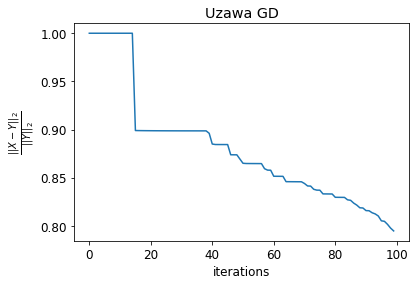

In [93]:
plt.title('Uzawa GD')
plt.ylabel(r'$\frac{||X - Y||_{2}}{||Y||_{2}}$', fontsize = 14)
plt.xlabel('iterations')
plt.plot(obj1);

In [13]:
# отнормируем полученную матрицу в соотвествии с мин и макс значениями рейтингов фильмов
# без этого рейтинг может выйти за пределы '5'
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5)) # мин: 0, макс: 5
X1_scaled = scaler.fit_transform(X1)

In [14]:
X1_df = pd.DataFrame(np.round(X1_scaled,2))
X1_df

,0,1,2,3,4,5,6,7,8,9,...,6030,6031,6032,6033,6034,6035,6036,6037,6038,6039
0,0.82,1.54,1.18,1.25,2.17,1.36,1.15,0.99,0.94,1.04,...,1.45,1.64,1.57,1.03,1.34,1.12,0.60,1.85,1.51,1.73
1,0.74,1.85,1.55,1.11,1.90,1.58,1.35,0.99,1.37,1.53,...,1.12,1.54,1.49,1.13,1.33,1.07,0.51,1.57,1.50,1.63
2,2.16,1.56,4.67,1.77,2.19,2.11,4.49,1.30,2.15,2.11,...,1.38,3.10,1.59,1.57,1.45,1.36,1.92,1.68,1.88,1.72
3,1.91,1.30,3.16,0.03,0.86,3.75,1.01,0.52,3.87,4.97,...,1.45,2.08,1.49,1.43,2.20,0.93,1.59,0.97,1.00,1.14
4,1.48,2.28,1.83,1.53,3.61,1.78,1.60,0.30,0.82,1.10,...,1.33,1.54,1.85,1.25,1.43,1.30,0.52,2.48,1.57,2.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,0.73,1.43,1.30,1.08,2.06,1.41,1.12,0.78,0.76,0.70,...,1.12,1.51,1.46,1.05,1.30,1.03,0.54,1.75,1.39,1.60
3672,0.74,1.42,1.30,1.09,2.06,1.39,1.12,0.77,0.75,0.67,...,1.12,1.49,1.46,1.06,1.30,1.04,0.54,1.75,1.39,1.60
3673,0.74,1.42,1.30,1.09,2.06,1.39,1.12,0.77,0.75,0.67,...,1.12,1.49,1.46,1.06,1.30,1.04,0.54,1.75,1.39,1.60
3674,0.74,1.42,1.30,1.09,2.06,1.39,1.12,0.77,0.75,0.67,...,1.12,1.49,1.46,1.06,1.30,1.04,0.54,1.75,1.39,1.60


In [15]:
pd.DataFrame(Y)

,0,1,2,3,4,5,6,7,8,9,...,6030,6031,6032,6033,6034,6035,6036,6037,6038,6039
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,4,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,4,0,0,0,0,4,4,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,5,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X1_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,6030,6031,6032,6033,6034,6035,6036,6037,6038,6039
count,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,...,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000
mean,0.846537,1.506045,1.466077,1.150340,2.162715,1.486798,1.433466,0.898240,0.994627,0.998052,...,1.157933,1.554510,1.497326,1.081608,1.316273,1.058294,0.561251,1.798245,1.410218,1.647271
std,0.288701,0.296629,0.383461,0.222497,0.323775,0.252403,0.508536,0.350438,0.469617,0.515369,...,0.252906,0.237623,0.230707,0.175115,0.164909,0.191988,0.144458,0.263503,0.177938,0.273639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.730000,1.400000,1.300000,1.070000,2.040000,1.390000,1.140000,0.750000,0.760000,0.690000,...,1.090000,1.480000,1.430000,1.040000,1.270000,1.000000,0.520000,1.710000,1.360000,1.550000
50%,0.760000,1.430000,1.350000,1.100000,2.070000,1.420000,1.250000,0.790000,0.820000,0.800000,...,1.120000,1.510000,1.460000,1.060000,1.300000,1.030000,0.540000,1.750000,1.390000,1.600000
75%,0.840000,1.530000,1.502500,1.170000,2.190000,1.510000,1.540000,0.930000,1.020000,1.120000,...,1.160000,1.580000,1.510000,1.090000,1.320000,1.060000,0.560000,1.800000,1.420000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Ранг снизился значительно, что нам и нужно, ошибка снижается размеренно и восстановленная матрица рейтингов выглядит вроде неплохо.

### <font color='royalblue'>3\. Реализуем какую-либо версию метода проксимального градиентного спуска для решения RegMC problem.</font>

*Рассмотрим данную функцию как составную:
$f\left( x \right) = g\left( x \right) + h\left( x \right)$, где $g -$ 
выпуклая и дифференцируемая, а $h -$ выпуклая, но не гладкая. Так как
$h -$ не дифференцируемая, мы не можем напрямую взять градиент и
применить обновление шага градиентного спуска:*

$$x^{+} = x - t\nabla f\left( x \right)$$

*Поэтому, мы сначала найдем градиент сглаженной версии данной функции,
соблюдая условия близости матрицы X к Y с относительно малым рангом.*

*Так как шаг $x^{+} = x - t\nabla f\left( x \right)$ получен из
квадратичной аппроксимации, применим ее для $g$:*

$$x^{+} = \underset{z}{\text{argmin}}{g_{t}\left( z \right) + h\left( z \right) =}\underset{z}{\text{argmin}}{g\left( x \right) + \nabla{g\left( x \right)}^{T}\left( z - x \right) + \frac{1}{2t}\left\| z - x \right\|_{2}^{2} + h\left( z \right) = \underset{z}{\text{argmin}}{\frac{1}{2t}\left\| z - \left( x - t\nabla g\left( x \right) \right) \right\|_{2}^{2} + h\left( z \right)}}$$

*Зададим проксимальное отображение как функцию от* $h$ *и* $t$*:*

$\text{prox}_{h,t}\left( x \right) = \underset{z}{\text{argmin}}{\frac{1}{2t}\left\| z - x \right\|_{2}^{2} + h\left( z \right)}$*,
тогда*
$x^{+} = \text{prox}_{h,t}\left( x - t\nabla g\left( x \right) \right) \Rightarrow \ x^{k} = \text{prox}_{t_{k}}\left( x^{k - 1} - t_{k}\nabla g(x^{k - 1}) \right)$

*Таким образом, для нашей задачи из п. 1:*

$$g\left( X \right) = \frac{1}{2}\left\| P_{E}\left( Y) - P_{E}(X \right) \right\|_{2}^{2} \Rightarrow \nabla g\left( X \right) = - (P_{E}\left( Y) - P_{E}(X \right))\ $$

$$\text{prox}_{t}\left( X \right) = \underset{Z}{\text{argmin}}{\frac{1}{2t}\left\| X - Z \right\|_{F}^{2} + {\tau\left\| X \right\|}_{\text{tr}}} = D_{\text{τt}}\left( X \right),\ где\ D_{\tau}\left( X \right) = U\Sigma_{\tau}V^{T}$$

$$\Rightarrow в\ данном\ случае\ проксимальное\ отображение\ это\ и\ есть\ обрезка\ сингулярных\ значений\ подбираемой\ матрицы.$$

*Тогда шаг обновления проксимального градиента*
$X^{+} = D_{\text{τt}}(X + tP_{E}\left( Y - X \right)) \Rightarrow$

*Обновление шага c обрезкой сингуярных начений по $\tau$ в качестве
прокс-функции будет выглядеть следующим образом:*

$$X^{k} = D_{\tau t_{k - 1}}\left( X^{k - 1} + t_{k - 1}P_{E}\left( Y - X^{k - 1} \right) \right)$$

*Реализуем быстрый проксимальный градиентный спуск:*

$$\begin{matrix}
\  \\
x^{k} = \text{prox}_{t_{k}}\left( x^{k - 1} - t_{k}\nabla g\left( x^{k - 1} \right) \right)\  \\
v = X^{k - 1} + \frac{k - 2}{k + 1}(X^{k - 1} - X^{k - 2}) \\
\end{matrix} \Rightarrow X^{k} = D_{\tau t_{k - 1}}\left( v + t_{k - 1}P_{E}\left( Y - v \right) \right)$$

*Этот алгоритм немного отличается от приведенного в 1-м пункте. У них
разные ограничения.*

$$\begin{matrix}
\text{minimize: τ}\left\| X \right\|_{\text{tr}} + \ {1/2\left\| X \right\|}_{F}^{2} \\
\text{subject to: }\ P_{E}\left( X \right) = P_{E}\left( Y \right) \\
X^{k} = D_{\tau}\left( \nu^{k - 1} \right) \\
\nu^{k} = \nu^{k - 1} + t_{k}P_{E}\left( Y - X^{k} \right) \\
\end{matrix}\text{      .vs      }\begin{matrix}
\text{minimize: τ}\left\| X \right\|_{\text{tr}} + \ {1/2\left\| P_{E}\left( X) - P_{E}(Y \right) \right\|}_{F}^{2} \\
\text{subject to: }\ P_{E}\left( X \right) = P_{E}\left( Y \right) \\
X^{k} = D_{\tau t_{k - 1}}\left( \nu^{k - 1} \right) \\
\nu^{k} = X^{k} + t_{k}P_{E}\left( Y - X^{k} \right) \\
\end{matrix}$$

*Разница между ними получается большой из-за замены промежуточной матрицы $\nu^{k-1}$ матрицей $X^{k}$ и $t_{k}=t$.*

*В проксимальном спуске выбор большого $\tau$  дает последовательность
итераций малого ранга и ограничение с малой ядерной нормой. Ограничение,
однако, не соответствует данным, поэтому нужно выбирать небольшое или
умеренное значение $\tau$. Однако, когда $\tau$ недостаточно
велико, $X^{k}$ может не иметь малый ранг, даже если решение имеет малый
ранг (и может потребоваться вычислять много сингулярных векторов),
а промежуточная $\nu^{k}$ недостаточно разреженная, чтобы сделать алгоритм
вычислительно привлекательным. Причем ограничение может и не иметь малую
ядерную норму. Следовательно алгоритм Узавы выглядит более подходщим.*

In [55]:
def acc_prox_gd(Y,#
                E,#
                max_iter=100,#
                t=1,#
                tau=1,#
                beta=0.3,#
                tol= 1e-4,
                image = False):

    def proj_op(X, E):
        return E*X

    def prox_op(X,t):
        a = np.asarray(X, np.float32)
        b=torch.from_numpy(a)
        U, S, V = torch.linalg.svd(b, full_matrices=False)
        S=S.numpy()
        U=U.numpy()
        V=V.numpy()
        zero = np.zeros(np.shape(S))
        ones = np.ones(np.shape(S))
        S_t = np.maximum(S-t*ones,zero)
        return U @ np.diag(S_t) @ V

    def g(Y, X, E):
        '''
        g(x) = 1/2||P_E(Y)-P_E(X)||_F^2 m*1
        '''
        return 0.5*(np.linalg.norm(proj_op(Y-X, E))**2)

    def f(Y,X,tau, E):
        '''
        objective function f(x) = g(x) + h(x)
        g(x) = 1/2||P_E(Y)-P_E(X)||_F ^2
        h(x) = tau*||X||_tr
        
        ''' 
        a = np.asarray(X, np.float32)
        b=torch.from_numpy(a)
        nuc_norm = torch.linalg.norm(b, 'nuc')    
        nuc_norm=nuc_norm.numpy()
        
        gx = g(Y, X, E)
        hx = tau*nuc_norm
        return gx + hx  

    def grad(Y, X, E):
        return -proj_op(Y-X, E)
    
    def upper_bound(Y, X, E, X_1, t):
        X_Diff = X_1 - X
        return g(Y, X, E) + np.sum(grad(Y, X, E)*X_Diff) + 1.0/(2.0*t)*np.linalg.norm(X_Diff)**2
    
    X_prev1 = np.zeros(Y.shape) # зададим матрицу, которой будем приближаться к Y
    X_prev2 = X_prev1
    obj1 = []
    obj2 = []
    
    for k in tqdm(range(max_iter)):
        
        # Nesterov acceleration, добавим моментум
        v = X_prev1 + ((k-2)/(k+1)) * (X_prev1 - X_prev2) # здесь мы выбрали стратегию (k-2)/(k+1)
        
        while True:
            # шаг обновления спуска
            X_k = prox_op(v-t*grad(Y, v, E),t*tau)
            
            # применим метод backtracking line search
            if g(Y, X_k, E) <= upper_bound(Y, v, E, X_k, t):
                break
            else:
                t = beta*t # адаптивный размер шага
        
        f_k = f(Y,X_k,tau, E)
        f_prev1 = f(Y,X_prev1,tau, E)
        
        # посчитаем ошибку приближения матрицы
        
        reconstr_error = np.linalg.norm(X_k - Y)/ np.linalg.norm(Y)
        obj1.append(reconstr_error) # сохраним значения ошибки на каждом шаге
        
        if image == True:
            ssim_img = ssim(Y, X_k, data_range=X_k.max() - X_k.min())
            obj2.append(ssim_img)
        else:
            obj2=[]
        
        # сходимость
        if k > 1 and np.linalg.norm(f_k - f_prev1) < tol:
            break

        X_prev2 = X_prev1
        X_prev1 = X_k
    
    return X_k, obj1, obj2

In [35]:
X2, obj2, _ = acc_prox_gd(Y, E, max_iter=100, t=1, tau=0.1, beta=0.5, tol=1e-6)

100%|██████████| 100/100 [14:35<00:00,  8.75s/it]


In [36]:
print ("rank Y =", np.linalg.matrix_rank(Y)) 
print ("rank X2 =",np.linalg.matrix_rank(X2))

rank Y = 3633
rank X2 = 1591


In [37]:
X2 = scaler.fit_transform(X2)

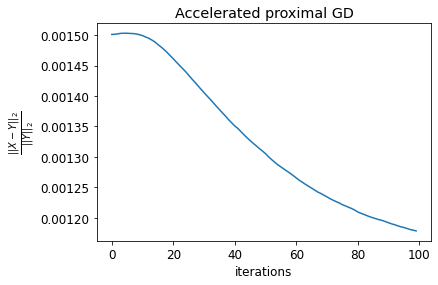

In [81]:
plt.title('Accelerated proximal GD')
plt.ylabel(r'$\frac{||X - Y||_{2}}{||Y||_{2}}$', fontsize = 14)
plt.xlabel('iterations')
plt.plot(obj2);

In [39]:
X2_df = pd.DataFrame(np.round(X2,2))
X2_df

,0,1,2,3,4,5,6,7,8,9,...,6030,6031,6032,6033,6034,6035,6036,6037,6038,6039
0,3.38,0.47,1.20,0.82,1.22,0.61,1.12,1.04,1.55,1.59,...,0.41,0.60,0.48,1.14,0.44,0.62,0.81,0.63,0.72,0.62
1,0.55,3.28,1.14,1.20,0.79,0.72,0.95,1.68,4.15,1.84,...,0.50,0.64,0.48,0.62,0.91,0.72,0.94,0.53,0.34,0.66
2,2.01,0.75,4.17,0.94,1.14,1.21,5.00,1.99,2.83,1.38,...,0.13,1.44,0.97,1.04,1.19,0.73,1.25,0.78,0.63,1.03
3,2.05,0.95,1.75,4.14,0.87,1.05,2.20,2.24,4.15,4.15,...,0.49,1.04,0.99,0.72,0.88,0.75,1.33,0.63,1.14,0.66
4,2.35,1.04,1.39,1.14,5.00,0.91,1.08,0.63,0.85,5.00,...,0.28,0.82,0.89,1.10,0.48,0.65,0.99,0.88,0.69,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,0.99,0.84,0.88,0.72,0.97,0.67,0.80,0.90,0.77,0.71,...,0.47,0.59,0.61,0.76,0.56,0.48,0.76,0.63,0.54,0.62
3672,0.91,0.72,0.87,0.65,0.91,0.72,0.91,0.88,0.68,0.77,...,0.45,0.54,0.64,0.67,0.58,0.52,0.71,0.63,0.56,0.70
3673,0.96,0.70,0.88,0.66,0.92,0.69,0.86,0.85,0.84,0.72,...,0.47,0.60,0.62,0.74,0.66,0.44,0.77,0.64,0.54,0.65
3674,0.94,0.68,0.87,0.70,0.91,0.67,0.93,0.86,0.76,0.80,...,0.46,0.64,0.62,0.71,0.64,0.47,0.71,0.66,0.57,0.66


In [40]:
pd.DataFrame(Y)

,0,1,2,3,4,5,6,7,8,9,...,6030,6031,6032,6033,6034,6035,6036,6037,6038,6039
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,4,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,4,0,0,0,0,4,4,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,5,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ранг снизился только на половину, ошибка снижается размеренно как и в первом случае.

### <font color='royalblue'>4\. Протестируем алгоритмы из п.2-3 на тестовых данных. Для построния тестовых данных возьмем произвольный датасет картинок. Для каждой картинки удалим случайный набор пикселей (от 10% до 90%). Сравним скорость сходимости методов на тестовых данных и предложим метод сравнения.</font>

In [41]:
# импортируем изображения из библиотеки skimage
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_ubyte, img_as_float
gray_images = {
        "coffee":rgb2gray(img_as_float(data.coffee())),
        "camera":data.camera(),
        "astro":rgb2gray(img_as_float(data.astronaut())),
        "cat":rgb2gray(img_as_float(data.chelsea())),
        "coins": data.coins(),
        "clock":data.clock(),
        "page":data.page()
}

In [42]:
def image_mask(p, img):
    img_mask = np.random.binomial(1, p, img.shape) # где p - это сколько нужно удалить пикселей от 10% до 90%
    return img_mask

In [43]:
def compare_images(ref_img, img_mask, reconstr_img1, reconstr_img2):
    plt.rcParams.update({'font.size': 12})
    fig,axes = plt.subplots(1,4,figsize=(20,8))

    axes[0].imshow(ref_img,cmap='gray')
    axes[0].set_title('True, rank = ' + str(np.linalg.matrix_rank(ref_img))) 
    axes[0].axis('off');

    axes[1].imshow(img_mask*ref_img,cmap='gray')
    axes[1].set_title('Removed pixels')
    axes[1].axis('off');

    axes[2].imshow(reconstr_img1,cmap='gray')
    axes[2].set_title('Reconstr 1st algo, rank = '+ str(np.linalg.matrix_rank(reconstr_img1)))
    axes[2].axis('off');
    
    axes[3].imshow(reconstr_img2,cmap='gray')
    axes[3].set_title('Reconstr 2nd algo, rank = '+ str(np.linalg.matrix_rank(reconstr_img2)))
    axes[3].axis('off');

In [89]:
def compare_metrics(obj1_1, obj1_2, obj2_1, obj2_2):
    plt.rcParams.update({'font.size': 12})
    fig,axes = plt.subplots(1,2,figsize=(10,4))

    axes[0].plot(obj1_1, c='gray', label="1st algorithm")
    axes[0].plot(obj1_2, c='blue', label="2nd algorithm")
    axes[0].set_title('Scaled error  ' + r'$\frac{||X - Y||_{2}}{||Y||_{2}}$', fontsize = 14) 
    axes[0].legend()

    axes[1].plot(obj2_1, c='gray', label="1st algorithm")
    axes[1].plot(obj2_2, c='blue', label="2nd algorithm")
    axes[1].set_title('Structural similarity') 
    axes[1].legend()

#### Исходное 1-е изображение:

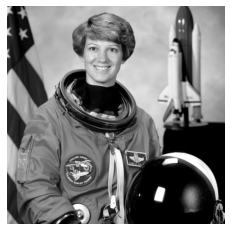

shape = 512 x 512


In [45]:
ref_img1 = gray_images["astro"]
img_mask1 = image_mask(0.2, ref_img1)
plt.imshow(ref_img1,cmap='gray')
plt.axis('off')
plt.show()
print ('shape =', ref_img1.shape[0], 'x', ref_img1.shape[1])

#### Исходное 2-е изображение:

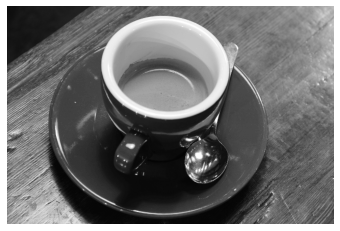

shape = 400 x 600


In [46]:
ref_img2 = gray_images["coffee"]
img_mask2 = image_mask(0.6, ref_img2)
plt.imshow(ref_img2,cmap='gray')
plt.axis('off')
plt.show()
print ('shape =', ref_img2.shape[0], 'x', ref_img2.shape[1])

#### 1-й алгоритм спуска (алгоритм Узавы):

In [47]:
reconstr_img1_1, obj1_img1_1, obj2_img1_1 = SVT(ref_img1, img_mask1, tol =1e-6, max_iter = 200, image= True)

  0%|          | 0/200 [00:00<?, ?it/s]/home/kuanysh/.local/lib/python3.6/site-packages/skimage/metrics/_structural_similarity.py:208: RuntimeWarning: invalid value encountered in true_divide
  S = (A1 * A2) / D
100%|██████████| 200/200 [00:12<00:00, 15.65it/s]


In [48]:
reconstr_img2_1, obj1_img2_1, obj2_img2_1 = SVT(ref_img2, img_mask2, tol =1e-6, max_iter = 200, image= True)

100%|██████████| 200/200 [00:03<00:00, 53.05it/s]


#### 2-й алгоритм спуска (проксимальный град. спуск):

In [56]:
reconstr_img1_2, obj1_img1_2, obj2_img1_2 = acc_prox_gd(ref_img1, img_mask1, max_iter=200, t=1, tau=0.1, beta=0.5, tol=1e-6, image= True)

100%|██████████| 200/200 [00:52<00:00,  3.80it/s]


In [57]:
reconstr_img2_2, obj1_img2_2, obj2_img2_2 = acc_prox_gd(ref_img2, img_mask2, max_iter=200, t=1, tau=0.01, beta=0.5, tol=1e-6, image= True)

100%|██████████| 200/200 [00:52<00:00,  3.82it/s]


### Результаты:

Самая традиционная метрика в оченке качества сходства между изображениями - это среднеквадратическая ошибка (MSE), где мы просто вычисляем квадрат разницы пиксель за пикселем. Это работает хорошо только в том случае, если мы хотим создать изображение с наилучшим соответствием цветов пикселей с исходным изображением. Иногда мы хотим сосредоточиться на структуре или рельефе изображения.

Рассмотрим индекс структурного сходства (SSIM). Он коррелирует с качеством и восприятием зрительной системы человека (цветовая модель HVS). Пиксели имеют сильную взаимосвязь, особенно когда они близки пространственно. Вместо использования традиционных методов суммирования ошибок, SSIM моделирует искажение изображения как комбинацию трех факторов: потеря корреляции, искажение яркости и искажение контрастности.

Некоторые исследования показали, что в отличие от SSIM, MSE плохо справляется с распознаванием структурного содержимого в изображениях, поскольку различные типы ухудшения, применяемые к одному и тому же изображению, могут давать одинаковое значение MSE. Другие исследования показали, что MSE обладает лучшими характеристиками при оценке качества зашумленных изображений.

Если бы рассматривали спектрограммы, то MSE являлась бы вполне годной для оценки сходства, однака ниже мы рассмотрим изображения трехмерных объектов, поэтому SSIM лучше подойдет в качестве метрики.

#### 1-е изображение:

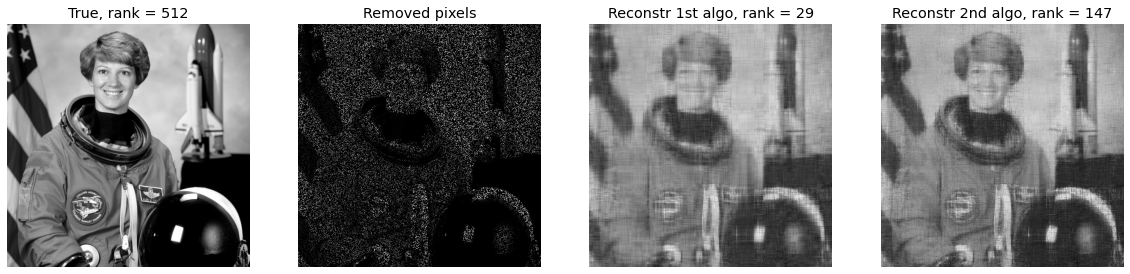

In [84]:
compare_images(ref_img1, img_mask1, reconstr_img1_1, reconstr_img1_2)

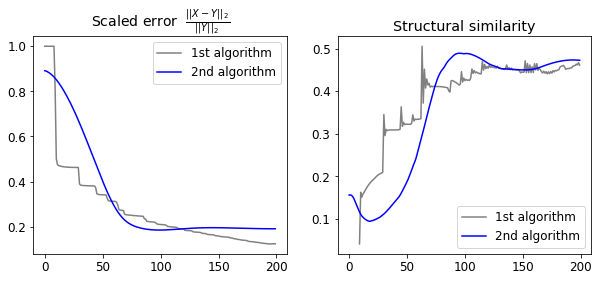

In [90]:
compare_metrics(obj1_img1_1, obj1_img1_2, obj2_img1_1, obj2_img1_2)

Хоть первый алгоритм значительно снизил ранг, и, тем самым, убрал некоторые детали из изображения, пик SSIM у него достигается значительно раньше. В любом случае можно понять, что изображено на картинке, но нам нужно изначально решить, какие детали изображения нам важны.

#### 2-е изображение:

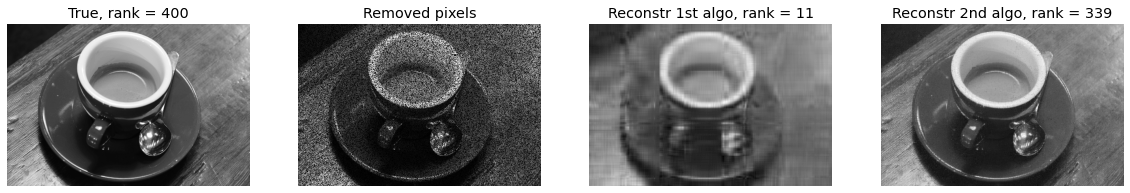

In [91]:
compare_images(ref_img2, img_mask2, reconstr_img2_1, reconstr_img2_2)

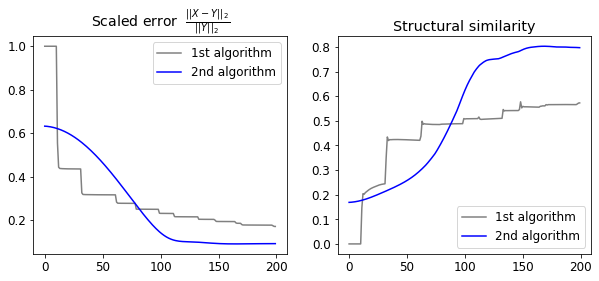

In [92]:
compare_metrics(obj1_img2_1, obj1_img2_2, obj2_img2_1, obj2_img2_2)

Здесь же, бесспорно лучше показыет себя ускоренный проксимальный градиентный спуск.